In [202]:
#import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import linregress
import requests
import numpy as np

In [203]:
#read in data from anomaly analysis
data = pd.read_csv('Datasets/PerfectStorm.csv')

In [204]:
data

,Code,Year,Name,Landfall Counts,Max Category Rating,Anomaly
0,AL021851,1851,UNNAMED,0,0,0.00
1,AL031851,1851,UNNAMED,0,0,0.00
2,AL041851,1851,UNNAMED,1,3,0.00
3,AL051851,1851,UNNAMED,0,0,0.00
4,AL061851,1851,UNNAMED,1,0,0.00
...,...,...,...,...,...,...
1946,AL132022,2022,JULIA,4,1,0.67
1947,AL142022,2022,KARL,0,0,0.67
1948,AL152022,2022,LISA,1,1,0.67
1949,AL162022,2022,MARTIN,0,1,0.67


In [205]:
#filter to specific years for analysis
data2= data[(data['Year'] >= 1991) & (data['Year'] < 2021)]

In [206]:
data2

,Code,Year,Name,Landfall Counts,Max Category Rating,Anomaly
1427,AL011991,1991,ANA,0,0,0.34
1428,AL021991,1991,UNNAMED,0,0,0.34
1429,AL031991,1991,BOB,3,3,0.34
1430,AL041991,1991,UNNAMED,0,0,0.34
1431,AL051991,1991,UNNAMED,0,0,0.34
...,...,...,...,...,...,...
1909,AL272020,2020,EPSILON,0,3,0.72
1910,AL282020,2020,ZETA,2,3,0.72
1911,AL292020,2020,ETA,4,4,0.72
1912,AL302020,2020,THETA,0,0,0.72


In [207]:
#pull out columns for graphing and group by year
spy = data2.groupby('Year')['Code'].count()
anomalies = pd.Series(data2.groupby('Year')["Anomaly"].mean(), name = "Anomalies")
categorymean = data2.groupby('Year')['Max Category Rating'].mean()

In [208]:
#merge storms per year and anomalies for graphing
combined_data = pd.merge(spy, anomalies, on='Year')
combined_data

,Code,Anomalies
Year,,
1991,12,0.34
1992,10,0.25
1993,10,0.26
1994,12,0.30
1995,21,0.34
1996,13,0.31
1997,9,0.47
1998,14,0.52
1999,16,0.31


In [209]:
#create regression function
def regression (x_values, y_values, xlabel, ylabel, title, coords,filename):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,coords,fontsize=15,color="red")
    print(f"The r-squared is: {rvalue**2}")
    plt.savefig(f'Visualizations/{filename}')

The r-squared is: 0.07001662480044375


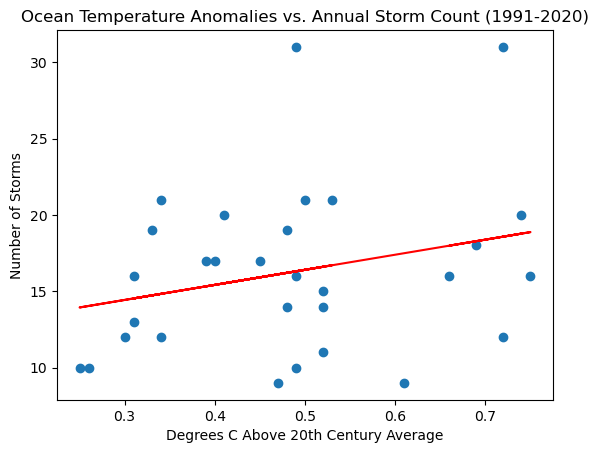

In [210]:
#run regression function on anomalies vs storm counts
regression(combined_data['Anomalies'], combined_data['Code'], "Degrees C Above 20th Century Average" , "Number of Storms", "Ocean Temperature Anomalies vs. Annual Storm Count (1991-2020)",(0,0),"AnomaliesVsStormFrequency")

In [211]:
#merge data for second regression anomalies vs. average category rating for all annual storms
combineddata2 = pd.merge(anomalies, categorymean, on="Year")

The r-squared is: 0.004896637867522077


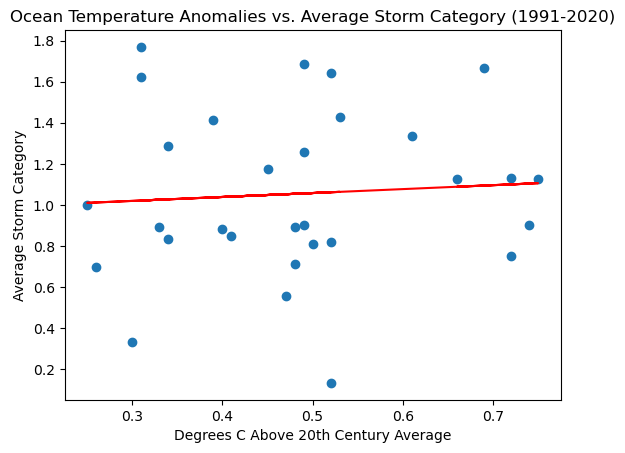

In [212]:
#run regression on anomalies vs. Average Storm category
regression(combineddata2['Anomalies'], combineddata2['Max Category Rating'], "Degrees C Above 20th Century Average" , "Average Storm Category", "Ocean Temperature Anomalies vs. Average Storm Category (1991-2020)",(0,0),"AnomaliesVsStormSeverity")

In [213]:
#get surface temperature and co2 data from Global warming api
baseurl = 'https://global-warming.org/api/'
temp = 'temperature-api'
co2 = 'co2-api'

surfacetemps = requests.get(f'{baseurl}{temp}').json()
co2levels = requests.get(f'{baseurl}{co2}').json()

In [214]:
#put surface temps into dataframe
surfacetempdf = pd.DataFrame(surfacetemps['result'])

In [215]:
#convert time to a float for filtering
surfacetempdf['time'] = surfacetempdf['time'].astype(float)

In [216]:
#round down to just years
surfacetempdf['time'] = surfacetempdf['time'].apply(np.floor).astype(int)

In [217]:
#convert land temps to float
surfacetempdf['land'] = surfacetempdf['land'].astype(float)

In [218]:
#filter for dates
surfacetempdf = surfacetempdf[(surfacetempdf['time'] >= 1991) & (surfacetempdf['time'] < 2021)]

In [219]:
#get unique years into an array
years = surfacetempdf['time'].unique()
years

array([1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [220]:
#loop through dataset to average land temp anomalies for each year
landaverages = []
for i in years:
    tempsum = 0
    records = 0
    for index, row in surfacetempdf.iterrows():
        if row['time'] == i:
            tempsum = tempsum + row['land']
            records = records + 1
    tempavg = tempsum / records
    landaverages.append(tempavg)

In [221]:
#combine arrays into a dataframe
surfacetempdf2 = pd.DataFrame({"Year":years, "Land Temp Anomalies": landaverages})

In [222]:
#merge landtemp data with hurricane count data
combined_data = pd.merge(surfacetempdf2, spy, on='Year')

The r-squared is: 0.16301005803926244


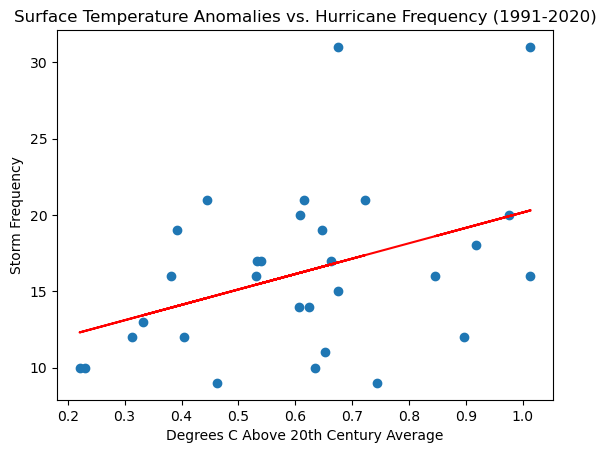

In [223]:
regression(combined_data['Land Temp Anomalies'], combined_data['Code'], "Degrees C Above 20th Century Average" , "Storm Frequency", "Surface Temperature Anomalies vs. Hurricane Frequency (1991-2020)",(0,0),"LandAnomaliesVsStormFrequency")

In [224]:
#combine data for storm severity
combined_data = pd.merge(surfacetempdf2, categorymean, on='Year')

The r-squared is: 0.005392907739770635


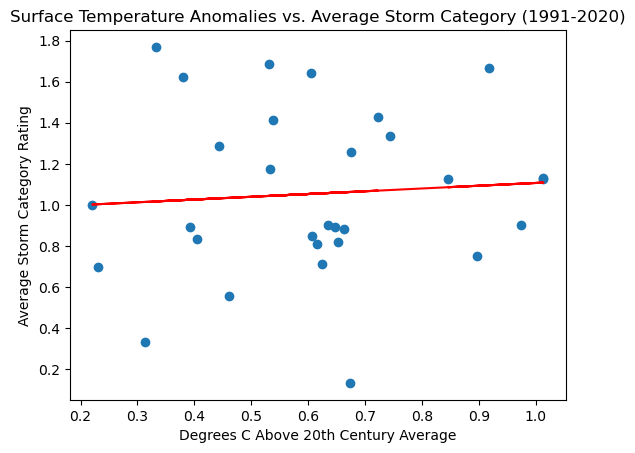

In [225]:
regression(combined_data['Land Temp Anomalies'], combined_data['Max Category Rating'], "Degrees C Above 20th Century Average" , "Average Storm Category Rating", "Surface Temperature Anomalies vs. Average Storm Category (1991-2020)",(0,0),"LandAnomaliesVsStormintensity")

In [226]:
co2df = pd.DataFrame(co2levels['co2'])

In [227]:
years = co2df['year'].unique()
years

array(['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021', '2022', '2023'], dtype=object)

In [228]:
co2df['trend'] = co2df['trend'].astype(float)

In [229]:
co2averages = []
for i in years:
    co2sum = 0
    records = 0
    for index, row in co2df.iterrows():
        if row['year'] == i:
            co2sum = co2sum + row['trend']
            records = records + 1
    co2avg = co2sum / records
    co2averages.append(co2avg)

In [230]:
co2df2 = pd.DataFrame({"Year":years, "CO2 Concentration": co2averages})

In [231]:
co2df2['Year'] = co2df2['Year'].astype(int)

In [232]:
combined_data = pd.merge(co2df2, spy, on='Year')

The r-squared is: 0.6676082799012515


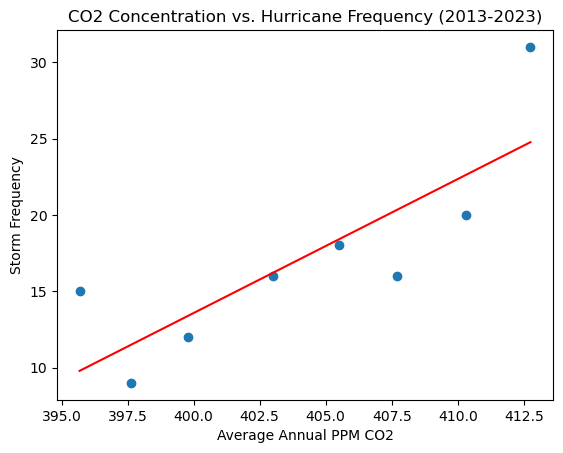

In [233]:
regression(combined_data['CO2 Concentration'], combined_data['Code'], "Average Annual PPM CO2" , "Storm Frequency", "CO2 Concentration vs. Hurricane Frequency (2013-2023)",(0,0),"CO2vsStormFrequency")

In [234]:
#combine data for storm severity
combined_data = pd.merge(co2df2, categorymean, on='Year')

The r-squared is: 0.17064657741648837


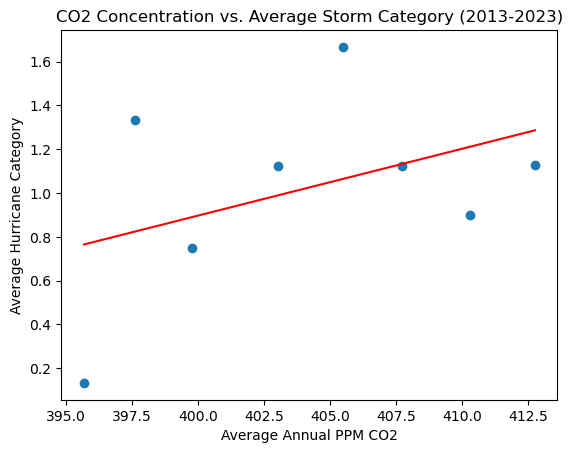

In [235]:
regression(combined_data['CO2 Concentration'], combined_data['Max Category Rating'], "Average Annual PPM CO2", "Average Hurricane Category", "CO2 Concentration vs. Average Storm Category (2013-2023)", (0,0) , "CO2VsStormintensity")